# 0. Setup Paths

In [2]:
import os


In [3]:
CUSTOM_MODEL_NAME = 'my_ssd_mobnet' 
PRETRAINED_MODEL_NAME = 'ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8'
PRETRAINED_MODEL_URL = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz'
TF_RECORD_SCRIPT_NAME = 'generate_tfrecord.py'
LABEL_MAP_NAME = 'label_map.pbtxt'

In [4]:
paths = {
    'WORKSPACE_PATH': os.path.join('Tensorflow', 'workspace'),
    'SCRIPTS_PATH': os.path.join('Tensorflow','scripts'),
    'APIMODEL_PATH': os.path.join('Tensorflow','models'),
    'ANNOTATION_PATH': os.path.join('Tensorflow', 'workspace','annotations'),
    'IMAGE_PATH': os.path.join('Tensorflow', 'workspace','images'),
    'MODEL_PATH': os.path.join('Tensorflow', 'workspace','models'),
    'PRETRAINED_MODEL_PATH': os.path.join('Tensorflow', 'workspace','pre-trained-models'),
    'CHECKPOINT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME), 
    'OUTPUT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'export'), 
    'TFJS_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfjsexport'), 
    'TFLITE_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfliteexport'), 
    'PROTOC_PATH':os.path.join('Tensorflow','protoc')
 }

In [5]:
files = {
    'PIPELINE_CONFIG':os.path.join('Tensorflow', 'workspace','models', CUSTOM_MODEL_NAME, 'pipeline.config'),
    'TF_RECORD_SCRIPT': os.path.join(paths['SCRIPTS_PATH'], TF_RECORD_SCRIPT_NAME), 
    'LABELMAP': os.path.join(paths['ANNOTATION_PATH'], LABEL_MAP_NAME)
}

In [6]:
for path in paths.values():
    if not os.path.exists(path):
        if os.name == 'posix':
            !mkdir -p {path}
        if os.name == 'nt':
            !mkdir {path}

# 1. Download TF Models Pretrained Models from Tensorflow Model Zoo and Install TFOD

In [7]:
# https://www.tensorflow.org/install/source_windows

In [8]:
if os.name=='nt':
    !pip install wget
    import wget

DEPRECATION: Loading egg at c:\users\smm\desktop\anpr\tfod\lib\site-packages\absl_py-2.1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\users\smm\desktop\anpr\tfod\lib\site-packages\apache_beam-2.54.0rc1-py3.11-win-amd64.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\users\smm\desktop\anpr\tfod\lib\site-packages\avro_python3-1.10.2-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\users\smm\desktop\anpr\tfod\lib\site-packages\contextlib2-21.6.

In [9]:
if not os.path.exists(os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection')):
    !git clone https://github.com/tensorflow/models {paths['APIMODEL_PATH']}

In [10]:
# Install Tensorflow Object Detection 
if os.name=='posix':  
    !apt-get install protobuf-compiler
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && cp object_detection/packages/tf2/setup.py . && python -m pip install . 
    
if os.name=='nt':
    url="https://github.com/protocolbuffers/protobuf/releases/download/v3.15.6/protoc-3.15.6-win64.zip"
    wget.download(url)
    !move protoc-3.15.6-win64.zip {paths['PROTOC_PATH']}
    !cd {paths['PROTOC_PATH']} && tar -xf protoc-3.15.6-win64.zip
    os.environ['PATH'] += os.pathsep + os.path.abspath(os.path.join(paths['PROTOC_PATH'], 'bin'))   
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && copy object_detection\\packages\\tf2\\setup.py setup.py && python setup.py build && python setup.py install
    !cd Tensorflow/models/research/slim && pip install -e . 

100% [..........................................................................] 1468733 / 1468733        1 file(s) moved.
        1 file(s) copied.
running build
running build_py
copying object_detection\eval_util.py -> build\lib\object_detection
copying object_detection\eval_util_test.py -> build\lib\object_detection
copying object_detection\exporter.py -> build\lib\object_detection
copying object_detection\exporter_lib_tf2_test.py -> build\lib\object_detection
copying object_detection\exporter_lib_v2.py -> build\lib\object_detection
copying object_detection\exporter_main_v2.py -> build\lib\object_detection
copying object_detection\exporter_tf1_test.py -> build\lib\object_detection
copying object_detection\export_inference_graph.py -> build\lib\object_detection
copying object_detection\export_tflite_graph_lib_tf2.py -> build\lib\object_detection
copying object_detection\export_tflite_graph_lib_tf2_test.py -> build\lib\object_detection
copying object_detection\export_tflite_graph_tf2

C:\Users\smm\Desktop\ANPR\tfod\Lib\site-packages\setuptools\_distutils\cmd.py:66: SetuptoolsDeprecationWarning: setup.py install is deprecated.
!!

        ********************************************************************************
        Please avoid running ``setup.py`` directly.
        Instead, use pypa/build, pypa/installer or other
        standards-based tools.

        See https://blog.ganssle.io/articles/2021/10/setup-py-deprecated.html for details.
        ********************************************************************************

!!
  self.initialize_options()
C:\Users\smm\Desktop\ANPR\tfod\Lib\site-packages\setuptools\_distutils\cmd.py:66: EasyInstallDeprecationWarning: easy_install command is deprecated.
!!

        ********************************************************************************
        Please avoid running ``setup.py`` and ``easy_install``.
        Instead, use pypa/build, pypa/installer or other
        standards-based tools.

        See htt

byte-compiling build\bdist.win-amd64\egg\object_detection\utils\category_util.py to category_util.cpython-311.pyc
byte-compiling build\bdist.win-amd64\egg\object_detection\utils\category_util_test.py to category_util_test.cpython-311.pyc
byte-compiling build\bdist.win-amd64\egg\object_detection\utils\colab_utils.py to colab_utils.cpython-311.pyc
byte-compiling build\bdist.win-amd64\egg\object_detection\utils\config_util.py to config_util.cpython-311.pyc
byte-compiling build\bdist.win-amd64\egg\object_detection\utils\config_util_test.py to config_util_test.cpython-311.pyc
byte-compiling build\bdist.win-amd64\egg\object_detection\utils\context_manager.py to context_manager.cpython-311.pyc
byte-compiling build\bdist.win-amd64\egg\object_detection\utils\context_manager_test.py to context_manager_test.cpython-311.pyc
byte-compiling build\bdist.win-amd64\egg\object_detection\utils\dataset_util.py to dataset_util.cpython-311.pyc
byte-compiling build\bdist.win-amd64\egg\object_detection\utils\

DEPRECATION: Loading egg at c:\users\smm\desktop\anpr\tfod\lib\site-packages\absl_py-2.1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\users\smm\desktop\anpr\tfod\lib\site-packages\apache_beam-2.54.0rc1-py3.11-win-amd64.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\users\smm\desktop\anpr\tfod\lib\site-packages\avro_python3-1.10.2-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\users\smm\desktop\anpr\tfod\lib\site-packages\contextlib2-21.6.

In [11]:
!pip install --upgrade build


DEPRECATION: Loading egg at c:\users\smm\desktop\anpr\tfod\lib\site-packages\absl_py-2.1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\users\smm\desktop\anpr\tfod\lib\site-packages\apache_beam-2.54.0rc1-py3.11-win-amd64.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\users\smm\desktop\anpr\tfod\lib\site-packages\avro_python3-1.10.2-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\users\smm\desktop\anpr\tfod\lib\site-packages\contextlib2-21.6.

In [12]:
!pip install tensorflow[and-cuda]

DEPRECATION: Loading egg at c:\users\smm\desktop\anpr\tfod\lib\site-packages\absl_py-2.1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\users\smm\desktop\anpr\tfod\lib\site-packages\apache_beam-2.54.0rc1-py3.11-win-amd64.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\users\smm\desktop\anpr\tfod\lib\site-packages\avro_python3-1.10.2-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\users\smm\desktop\anpr\tfod\lib\site-packages\contextlib2-21.6.


  Using cached tensorflow_intel-2.15.0-cp311-cp311-win_amd64.whl.metadata (5.1 kB)
  Using cached nvidia_cublas_cu12-12.2.5.6-py3-none-win_amd64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.2.142-py3-none-win_amd64.whl.metadata (1.6 kB)
  Using cached nvidia_cuda_nvcc_cu12-12.2.140-py3-none-win_amd64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_nvrtc_cu12-12.2.140-py3-none-win_amd64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.2.140-py3-none-win_amd64.whl.metadata (1.5 kB)
  Using cached nvidia_cudnn_cu12-8.9.4.25-py3-none-win_amd64.whl.metadata (1.6 kB)
  Using cached nvidia_cufft_cu12-11.0.8.103-py3-none-win_amd64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.3.141-py3-none-win_amd64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.5.2.141-py3-none-win_amd64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.2.141-py3-none-win_amd64.whl.metadata (1.6 kB)
INFO: pip is looking at multiple versions of tens

In [13]:
!pip list

Package                      Version         Editable project location
---------------------------- --------------- --------------------------------------------------------------------
absl-py                      2.1.0
absl-py                      2.1.0
anyio                        4.2.0
apache-beam                  2.54.0rc1
apache-beam                  2.54.0rc1
argon2-cffi                  23.1.0
argon2-cffi-bindings         21.2.0
arrow                        1.3.0
asttokens                    2.4.1
astunparse                   1.6.3
async-lru                    2.0.4
attrs                        23.2.0
avro-python3                 1.10.2
avro-python3                 1.10.2
avro-python3                 1.10.2
Babel                        2.14.0
beautifulsoup4               4.12.3
bleach                       6.1.0
build                        1.0.3
cachetools                   5.3.2
certifi                      2024.2.2
cffi                         1.16.0
charset-normalizer       

DEPRECATION: Loading egg at c:\users\smm\desktop\anpr\tfod\lib\site-packages\absl_py-2.1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\users\smm\desktop\anpr\tfod\lib\site-packages\apache_beam-2.54.0rc1-py3.11-win-amd64.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\users\smm\desktop\anpr\tfod\lib\site-packages\avro_python3-1.10.2-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\users\smm\desktop\anpr\tfod\lib\site-packages\contextlib2-21.6.

In [14]:
# # List of packages to install
# packages_to_install = [
#     'absl-py',
#     'apache-beam',
#     'avro-python3',
#     'contextlib2',
#     'cython',
#     'dm-tree',
#     'h5py',
#     'lvis',
#     'lxml',
#     'matplotlib',
#     'namex',
#     'numpy',
#     'object-detection',
#     'pandas',
#     'pillow',
#     'portalocker',
#     'pycocotools',
#     'pyparsing',
#     'regex',
#     'rich',
#     'sacrebleu',
#     'scipy',
#     'tabulate',
#     'tensorflow',
#     'tensorflow-io',
#     'tensorflow-io-gcs-filesystem',
#     'tf-models-official',
#     'tf-slim'
# ]

# # Install packages using pip
# for package in packages_to_install:
#     !pip install {package}


In [15]:
 !pip install protobuf==3.20.0


  Using cached protobuf-3.20.0-py2.py3-none-any.whl (162 kB)
  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.25.2
    Uninstalling protobuf-4.25.2:
      Successfully uninstalled protobuf-4.25.2


DEPRECATION: Loading egg at c:\users\smm\desktop\anpr\tfod\lib\site-packages\absl_py-2.1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\users\smm\desktop\anpr\tfod\lib\site-packages\apache_beam-2.54.0rc1-py3.11-win-amd64.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\users\smm\desktop\anpr\tfod\lib\site-packages\avro_python3-1.10.2-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\users\smm\desktop\anpr\tfod\lib\site-packages\contextlib2-21.6.

In [16]:
VERIFICATION_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'builders', 'model_builder_tf2_test.py')
# Verify Installation
!python {VERIFICATION_SCRIPT}

Running tests under Python 3.11.2: C:\Users\smm\Desktop\ANPR\tfod\Scripts\python.exe
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_deepmac
2024-02-12 14:35:06.863781: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE SSE2 SSE3 SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
W0212 14:35:06.924251 13944 batch_normalization.py:1531] `tf.keras.layers.experimental.SyncBatchNormalization` endpoint is deprecated and will be removed in a future release. Please use `tf.keras.layers.BatchNormalization` with parameter `synchronized` set to True.
C:\Users\smm\Desktop\ANPR\tfod\Lib\site-packages\object_detection-0.1-py3.11.egg\object_detection\builders\model_builder.py:1112: DeprecationWarning: The 'warn' function is deprecated, use 'warning' instead
  logging.warn(('Building experime

In [17]:
# pip install msvc-runtime

In [18]:
# !pip uninstall protobuf matplotlib -y
# !pip install protobuf matplotlib==3.2

In [19]:
!pip show tensorflow --version

Name: tensorflow
Version: 2.15.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: c:\users\smm\desktop\anpr\tfod\lib\site-packages\tensorflow-2.15.0-py3.11-win-amd64.egg
Requires: tensorflow-intel
Required-by: tf-models-official


DEPRECATION: Loading egg at c:\users\smm\desktop\anpr\tfod\lib\site-packages\absl_py-2.1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\users\smm\desktop\anpr\tfod\lib\site-packages\apache_beam-2.54.0rc1-py3.11-win-amd64.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\users\smm\desktop\anpr\tfod\lib\site-packages\avro_python3-1.10.2-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\users\smm\desktop\anpr\tfod\lib\site-packages\contextlib2-21.6.

In [20]:
pip install --upgrade setuptools wheel


Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\users\smm\desktop\anpr\tfod\lib\site-packages\absl_py-2.1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\users\smm\desktop\anpr\tfod\lib\site-packages\apache_beam-2.54.0rc1-py3.11-win-amd64.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\users\smm\desktop\anpr\tfod\lib\site-packages\avro_python3-1.10.2-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\users\smm\desktop\anpr\tfod\lib\site-packages\contextlib2-21.6.

In [21]:
# pip install tensorflow-gpu==2.11.0


In [22]:
# pip install protobuf==3.19.6


In [23]:
import object_detection

In [24]:
!pip list

Package                      Version         Editable project location
---------------------------- --------------- --------------------------------------------------------------------
absl-py                      2.1.0
absl-py                      2.1.0
anyio                        4.2.0
apache-beam                  2.54.0rc1
apache-beam                  2.54.0rc1
argon2-cffi                  23.1.0
argon2-cffi-bindings         21.2.0
arrow                        1.3.0
asttokens                    2.4.1
astunparse                   1.6.3
async-lru                    2.0.4
attrs                        23.2.0
avro-python3                 1.10.2
avro-python3                 1.10.2
avro-python3                 1.10.2
Babel                        2.14.0
beautifulsoup4               4.12.3
bleach                       6.1.0
build                        1.0.3
cachetools                   5.3.2
certifi                      2024.2.2
cffi                         1.16.0
charset-normalizer       

DEPRECATION: Loading egg at c:\users\smm\desktop\anpr\tfod\lib\site-packages\absl_py-2.1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\users\smm\desktop\anpr\tfod\lib\site-packages\apache_beam-2.54.0rc1-py3.11-win-amd64.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\users\smm\desktop\anpr\tfod\lib\site-packages\avro_python3-1.10.2-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\users\smm\desktop\anpr\tfod\lib\site-packages\contextlib2-21.6.

In [25]:
# if os.name =='posix':
#     !wget {PRETRAINED_MODEL_URL}
#     !mv {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
#     !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}
# if os.name == 'nt':
#     wget.download(PRETRAINED_MODEL_URL)
#     !move {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
#     !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}

# 2. Create Label Map

In [26]:
labels = [{'name':'licence', 'id':1}]

with open(files['LABELMAP'], 'w') as f:
    for label in labels:
        f.write(' item { \n')
        f.write('\tname:\'{}\'\n'.format(label['name']))
        f.write('\tid:{}\n'.format(label['id']))
        f.write('}\n')

# 3. Create TF records

In [27]:
# OPTIONAL IF RUNNING ON COLAB
ARCHIVE_FILES = os.path.join(paths['IMAGE_PATH'], 'archive.tar.gz')
if os.path.exists(ARCHIVE_FILES):
  !tar -zxvf {ARCHIVE_FILES}

In [28]:
if not os.path.exists(files['TF_RECORD_SCRIPT']):
    !git clone https://github.com/nicknochnack/GenerateTFRecord {paths['SCRIPTS_PATH']}

In [29]:
# !pip install builder

In [30]:
# !pip install --upgrade protobuf



In [31]:
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'train')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'train.record')} 
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'test')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'test.record')} 

Successfully created the TFRecord file: Tensorflow\workspace\annotations\train.record
Successfully created the TFRecord file: Tensorflow\workspace\annotations\test.record


In [32]:
# !pip install protobuf==3.20.0

In [33]:
# !pip install matplotlib

# 4. Copy Model Config to Training Folder

In [34]:
if os.name =='posix':
    !cp {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}
if os.name == 'nt':
    !copy {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}

        1 file(s) copied.


# 5. Update Config For Transfer Learning

In [35]:
!pip install protobuf==3.20.0


DEPRECATION: Loading egg at c:\users\smm\desktop\anpr\tfod\lib\site-packages\absl_py-2.1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\users\smm\desktop\anpr\tfod\lib\site-packages\apache_beam-2.54.0rc1-py3.11-win-amd64.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\users\smm\desktop\anpr\tfod\lib\site-packages\avro_python3-1.10.2-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\users\smm\desktop\anpr\tfod\lib\site-packages\contextlib2-21.6.

In [36]:
import tensorflow as tf
from object_detection.utils import config_util
from object_detection.protos import pipeline_pb2
from google.protobuf import text_format

In [37]:
config = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])

In [38]:
config

{'model': ssd {
   num_classes: 90
   image_resizer {
     fixed_shape_resizer {
       height: 320
       width: 320
     }
   }
   feature_extractor {
     type: "ssd_mobilenet_v2_fpn_keras"
     depth_multiplier: 1.0
     min_depth: 16
     conv_hyperparams {
       regularizer {
         l2_regularizer {
           weight: 4e-05
         }
       }
       initializer {
         random_normal_initializer {
           mean: 0.0
           stddev: 0.01
         }
       }
       activation: RELU_6
       batch_norm {
         decay: 0.997
         scale: true
         epsilon: 0.001
       }
     }
     use_depthwise: true
     override_base_feature_extractor_hyperparams: true
     fpn {
       min_level: 3
       max_level: 7
       additional_layer_depth: 128
     }
   }
   box_coder {
     faster_rcnn_box_coder {
       y_scale: 10.0
       x_scale: 10.0
       height_scale: 5.0
       width_scale: 5.0
     }
   }
   matcher {
     argmax_matcher {
       matched_threshold: 0.5
   

In [39]:
pipeline_config = pipeline_pb2.TrainEvalPipelineConfig()
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "r") as f:                                                                                                                                                                                                                     
    proto_str = f.read()                                                                                                                                                                                                                                          
    text_format.Merge(proto_str, pipeline_config)  

In [40]:
pipeline_config.model.ssd.num_classes = len(labels)
pipeline_config.train_config.batch_size = 4
pipeline_config.train_config.fine_tune_checkpoint = os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'checkpoint', 'ckpt-0')
pipeline_config.train_config.fine_tune_checkpoint_type = "detection"
pipeline_config.train_input_reader.label_map_path= files['LABELMAP']
pipeline_config.train_input_reader.tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'train.record')]
pipeline_config.eval_input_reader[0].label_map_path = files['LABELMAP']
pipeline_config.eval_input_reader[0].tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'test.record')]

In [41]:
config_text = text_format.MessageToString(pipeline_config)                                                                                                                                                                                                        
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "wb") as f:                                                                                                                                                                                                                     
    f.write(config_text)   

# 6. Train the model

In [42]:
TRAINING_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'model_main_tf2.py')

In [43]:
command = "python {} --model_dir={} --pipeline_config_path={} --num_train_steps=10000".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'])

In [44]:
print(command)

python Tensorflow\models\research\object_detection\model_main_tf2.py --model_dir=Tensorflow\workspace\models\my_ssd_mobnet --pipeline_config_path=Tensorflow\workspace\models\my_ssd_mobnet\pipeline.config --num_train_steps=10000


In [45]:
!pip install gin

DEPRECATION: Loading egg at c:\users\smm\desktop\anpr\tfod\lib\site-packages\absl_py-2.1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\users\smm\desktop\anpr\tfod\lib\site-packages\apache_beam-2.54.0rc1-py3.11-win-amd64.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\users\smm\desktop\anpr\tfod\lib\site-packages\avro_python3-1.10.2-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\users\smm\desktop\anpr\tfod\lib\site-packages\contextlib2-21.6.

In [46]:
pip install gin-config==0.1.1


Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\users\smm\desktop\anpr\tfod\lib\site-packages\absl_py-2.1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\users\smm\desktop\anpr\tfod\lib\site-packages\apache_beam-2.54.0rc1-py3.11-win-amd64.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\users\smm\desktop\anpr\tfod\lib\site-packages\avro_python3-1.10.2-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\users\smm\desktop\anpr\tfod\lib\site-packages\contextlib2-21.6.

In [47]:
# pip install tensorflow==2.13.0


  Using cached tensorflow-2.13.0-cp311-cp311-win_amd64.whl.metadata (2.6 kB)
  Using cached tensorflow_intel-2.13.0-cp311-cp311-win_amd64.whl.metadata (4.1 kB)
  Using cached protobuf-4.25.2-cp310-abi3-win_amd64.whl.metadata (541 bytes)
Using cached tensorflow-2.13.0-cp311-cp311-win_amd64.whl (1.9 kB)
Using cached tensorflow_intel-2.13.0-cp311-cp311-win_amd64.whl (276.6 MB)
Using cached protobuf-4.25.2-cp310-abi3-win_amd64.whl (413 kB)
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.0
    Uninstalling protobuf-3.20.0:
      Successfully uninstalled protobuf-3.20.0
  Attempting uninstall: tensorflow-intel
    Found existing installation: tensorflow-intel 2.13.1
    Uninstalling tensorflow-intel-2.13.1:
      Successfully uninstalled tensorflow-intel-2.13.1
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.13.1
    Uninstalling tensorflow-2.13.1:
      Successfully uninstalled tensorflow-2.13.1
Note: you may need to restart t

DEPRECATION: Loading egg at c:\users\smm\desktop\anpr\tfod\lib\site-packages\absl_py-2.1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\users\smm\desktop\anpr\tfod\lib\site-packages\apache_beam-2.54.0rc1-py3.11-win-amd64.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\users\smm\desktop\anpr\tfod\lib\site-packages\avro_python3-1.10.2-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\users\smm\desktop\anpr\tfod\lib\site-packages\contextlib2-21.6.

In [48]:
# !{command}

Traceback (most recent call last):
  File "C:\Users\smm\Desktop\ANPR\TFODCourse\Tensorflow\models\research\object_detection\model_main_tf2.py", line 31, in <module>
    from object_detection import model_lib_v2
  File "C:\Users\smm\Desktop\ANPR\tfod\Lib\site-packages\object_detection-0.1-py3.11.egg\object_detection\model_lib_v2.py", line 29, in <module>
    from object_detection import eval_util
  File "C:\Users\smm\Desktop\ANPR\tfod\Lib\site-packages\object_detection-0.1-py3.11.egg\object_detection\eval_util.py", line 35, in <module>
    from object_detection.metrics import coco_evaluation
  File "C:\Users\smm\Desktop\ANPR\tfod\Lib\site-packages\object_detection-0.1-py3.11.egg\object_detection\metrics\coco_evaluation.py", line 28, in <module>
    from object_detection.utils import object_detection_evaluation
  File "C:\Users\smm\Desktop\ANPR\tfod\Lib\site-packages\object_detection-0.1-py3.11.egg\object_detection\utils\object_detection_evaluation.py", line 46, in <module>
    from obje

In [49]:
command = "python {} --model_dir={} --pipeline_config_path={} --checkpoint_dir={}".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'])

In [50]:
print(command)

python Tensorflow\models\research\object_detection\model_main_tf2.py --model_dir=Tensorflow\workspace\models\my_ssd_mobnet --pipeline_config_path=Tensorflow\workspace\models\my_ssd_mobnet\pipeline.config --checkpoint_dir=Tensorflow\workspace\models\my_ssd_mobnet


In [51]:
!{command}

Traceback (most recent call last):
  File "C:\Users\smm\Desktop\ANPR\TFODCourse\Tensorflow\models\research\object_detection\model_main_tf2.py", line 31, in <module>
    from object_detection import model_lib_v2
  File "C:\Users\smm\Desktop\ANPR\tfod\Lib\site-packages\object_detection-0.1-py3.11.egg\object_detection\model_lib_v2.py", line 29, in <module>
    from object_detection import eval_util
  File "C:\Users\smm\Desktop\ANPR\tfod\Lib\site-packages\object_detection-0.1-py3.11.egg\object_detection\eval_util.py", line 35, in <module>
    from object_detection.metrics import coco_evaluation
  File "C:\Users\smm\Desktop\ANPR\tfod\Lib\site-packages\object_detection-0.1-py3.11.egg\object_detection\metrics\coco_evaluation.py", line 28, in <module>
    from object_detection.utils import object_detection_evaluation
  File "C:\Users\smm\Desktop\ANPR\tfod\Lib\site-packages\object_detection-0.1-py3.11.egg\object_detection\utils\object_detection_evaluation.py", line 46, in <module>
    from obje

# 8. Load Train Model From Checkpoint

In [52]:
pip install freetype-py


Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\users\smm\desktop\anpr\tfod\lib\site-packages\absl_py-2.1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\users\smm\desktop\anpr\tfod\lib\site-packages\apache_beam-2.54.0rc1-py3.11-win-amd64.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\users\smm\desktop\anpr\tfod\lib\site-packages\avro_python3-1.10.2-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\users\smm\desktop\anpr\tfod\lib\site-packages\contextlib2-21.6.

In [53]:
pip install matplotlib


Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\users\smm\desktop\anpr\tfod\lib\site-packages\absl_py-2.1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\users\smm\desktop\anpr\tfod\lib\site-packages\apache_beam-2.54.0rc1-py3.11-win-amd64.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\users\smm\desktop\anpr\tfod\lib\site-packages\avro_python3-1.10.2-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\users\smm\desktop\anpr\tfod\lib\site-packages\contextlib2-21.6.

In [47]:
import os
import tensorflow as tf
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder
from object_detection.utils import config_util

In [48]:
# Load pipeline config and build a detection model
configs = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])
detection_model = model_builder.build(model_config=configs['model'], is_training=False)

# Restore checkpoint
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore(os.path.join(paths['CHECKPOINT_PATH'], 'ckpt-12')).expect_partial()

@tf.function
def detect_fn(image):
    image, shapes = detection_model.preprocess(image)
    prediction_dict = detection_model.predict(image, shapes)
    detections = detection_model.postprocess(prediction_dict, shapes)
    return detections

# 9. Detect from an Image

In [56]:
# pip install opencv-python --upgrade


Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\users\smm\desktop\anpr\tfod\lib\site-packages\absl_py-2.1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\users\smm\desktop\anpr\tfod\lib\site-packages\apache_beam-2.54.0rc1-py3.11-win-amd64.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\users\smm\desktop\anpr\tfod\lib\site-packages\avro_python3-1.10.2-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\users\smm\desktop\anpr\tfod\lib\site-packages\contextlib2-21.6.

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\users\smm\desktop\anpr\tfod\lib\site-packages\absl_py-2.1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\users\smm\desktop\anpr\tfod\lib\site-packages\apache_beam-2.54.0rc1-py3.11-win-amd64.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\users\smm\desktop\anpr\tfod\lib\site-packages\avro_python3-1.10.2-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\users\smm\desktop\anpr\tfod\lib\site-packages\contextlib2-21.6.

In [49]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [50]:
category_index = label_map_util.create_category_index_from_labelmap(files['LABELMAP'])

In [51]:
IMAGE_PATH = os.path.join(paths['IMAGE_PATH'], 'test', 'Cars401.png')

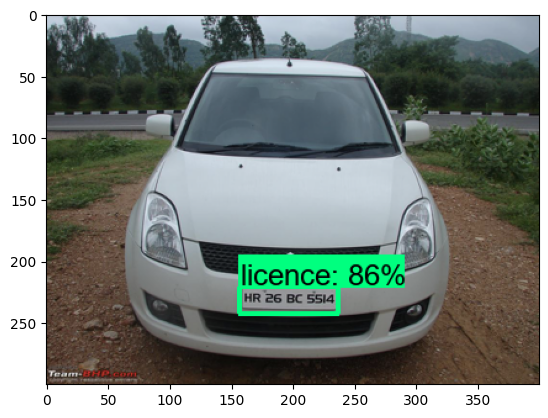

In [52]:
img = cv2.imread(IMAGE_PATH)
image_np = np.array(img)

input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
detections = detect_fn(input_tensor)

num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
              for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

label_id_offset = 1
image_np_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np_with_detections,
            detections['detection_boxes'],
            detections['detection_classes']+label_id_offset,
            detections['detection_scores'],
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=5,
            min_score_thresh=.8,
            agnostic_mode=False)

plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
plt.show()

In [53]:
detections

{'detection_boxes': array([[7.39031911e-01, 3.90751660e-01, 8.06849837e-01, 5.93169630e-01],
        [7.53122389e-01, 3.87465268e-01, 8.60585034e-01, 6.13341033e-01],
        [3.06920081e-01, 9.41673458e-01, 4.26737636e-01, 9.82690990e-01],
        [7.24352658e-01, 3.86362493e-01, 8.37556779e-01, 5.95172048e-01],
        [3.36698741e-01, 9.42202210e-01, 4.59693044e-01, 9.82663512e-01],
        [6.94022655e-01, 4.13855255e-01, 7.95338631e-01, 6.09153092e-01],
        [3.94823760e-01, 3.59341770e-01, 4.72328991e-01, 4.22182471e-01],
        [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 1.00000000e+00],
        [9.46569964e-02, 9.48254392e-03, 1.68713033e-01, 7.24741518e-02],
        [7.19636321e-01, 4.44260478e-01, 8.06911707e-01, 6.22742534e-01],
        [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 9.13167298e-01],
        [3.91845345e-01, 3.56881082e-01, 4.40149128e-01, 4.84250188e-01],
        [7.23004818e-01, 4.98148710e-01, 8.15653563e-01, 6.04175329e-01],
        [1.16368301

In [54]:
detections.keys()

dict_keys(['detection_boxes', 'detection_scores', 'detection_classes', 'raw_detection_boxes', 'raw_detection_scores', 'detection_multiclass_scores', 'detection_anchor_indices', 'num_detections'])

# applying ocr

In [55]:
pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

Looking in indexes: https://download.pytorch.org/whl/cu118Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\users\smm\desktop\anpr\tfod\lib\site-packages\absl_py-2.1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\users\smm\desktop\anpr\tfod\lib\site-packages\apache_beam-2.54.0rc1-py3.11-win-amd64.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\users\smm\desktop\anpr\tfod\lib\site-packages\avro_python3-1.10.2-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\users\smm\desktop\anpr\tfod\lib\site-packages\contextlib2-21.6.


  Using cached https://download.pytorch.org/whl/cu118/torchaudio-2.2.0%2Bcu118-cp311-cp311-win_amd64.whl (4.0 MB)
  Using cached https://download.pytorch.org/whl/typing_extensions-4.8.0-py3-none-any.whl (31 kB)
     ---------------------------------------- 0.0/2.7 GB ? eta -:--:--
     ---------------------------------------- 0.0/2.7 GB 13.9 MB/s eta 0:03:15
     ---------------------------------------- 0.0/2.7 GB 18.9 MB/s eta 0:02:24
     ---------------------------------------- 0.0/2.7 GB 19.3 MB/s eta 0:02:20
     ---------------------------------------- 0.0/2.7 GB 19.3 MB/s eta 0:02:20
     ---------------------------------------- 0.0/2.7 GB 19.3 MB/s eta 0:02:20
     ---------------------------------------- 0.0/2.7 GB 19.3 MB/s eta 0:02:20
     ---------------------------------------- 0.0/2.7 GB 19.3 MB/s eta 0:02:20
     ---------------------------------------- 0.0/2.7 GB 19.3 MB/s eta 0:02:20
     ---------------------------------------- 0.0/2.7 GB 19.3 MB/s eta 0:02:20
     -

In [56]:
pip install easyocr


  Using cached opencv_python_headless-4.9.0.80-cp37-abi3-win_amd64.whl.metadata (20 kB)
  Using cached typing_extensions-4.9.0-py3-none-any.whl.metadata (3.0 kB)
Using cached opencv_python_headless-4.9.0.80-cp37-abi3-win_amd64.whl (38.5 MB)
Using cached typing_extensions-4.9.0-py3-none-any.whl (32 kB)
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.5.0
    Uninstalling typing_extensions-4.5.0:
      Successfully uninstalled typing_extensions-4.5.0
Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\users\smm\desktop\anpr\tfod\lib\site-packages\absl_py-2.1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\users\smm\desktop\anpr\tfod\lib\site-packages\apache_beam-2.54.0rc1-py3.11-win-amd64.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\users\smm\desktop\anpr\tfod\lib\site-packages\avro_python3-1.10.2-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\users\smm\desktop\anpr\tfod\lib\site-packages\contextlib2-21.6.

In [57]:
detection_threshold = 0.7

In [58]:
image = image_np_with_detections
scores = list(filter(lambda x: x> detection_threshold, detections['detection_scores']))
boxes = detections['detection_boxes'][:len(scores)]
classes = detections['detection_classes'][:len(scores)]

In [59]:
detections['detection_scores']

array([0.86259687, 0.07221305, 0.05688961, 0.05353064, 0.04190011,
       0.04101613, 0.03715497, 0.03198717, 0.03038567, 0.02996077,
       0.02888855, 0.02861577, 0.02527438, 0.02363939, 0.02349278,
       0.02344534, 0.02334408, 0.02260914, 0.02236662, 0.02152325,
       0.02148718, 0.020763  , 0.02034545, 0.02003334, 0.02002396,
       0.01995077, 0.01985306, 0.01980763, 0.01959826, 0.01907182,
       0.01848013, 0.01836286, 0.01826053, 0.01814143, 0.01803778,
       0.01801137, 0.01790019, 0.0178543 , 0.01746797, 0.01737977,
       0.01716419, 0.01687861, 0.0167135 , 0.01661156, 0.01648337,
       0.01644276, 0.01641179, 0.01638945, 0.01635802, 0.01617269,
       0.01586881, 0.01583457, 0.01564504, 0.01562928, 0.01559689,
       0.01546872, 0.01544252, 0.0153604 , 0.01522434, 0.01522029,
       0.01512814, 0.015124  , 0.01505347, 0.01492137, 0.0147573 ,
       0.01453875, 0.01449848, 0.01437992, 0.01388012, 0.01387558,
       0.01373334, 0.01370879, 0.01367   , 0.01345945, 0.01345

In [60]:
detections['detection_scores'] > detection_threshold

array([ True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

In [61]:
width = image.shape[1]
height = image.shape[0]


In [62]:
width ,
height

300

In [63]:
# !pip install opencv-python-headless==4.7.0.72

In [64]:
pip install easyocr

  Using cached opencv_python_headless-4.9.0.80-cp37-abi3-win_amd64.whl.metadata (20 kB)
Using cached opencv_python_headless-4.9.0.80-cp37-abi3-win_amd64.whl (38.5 MB)
Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\users\smm\desktop\anpr\tfod\lib\site-packages\absl_py-2.1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\users\smm\desktop\anpr\tfod\lib\site-packages\apache_beam-2.54.0rc1-py3.11-win-amd64.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\users\smm\desktop\anpr\tfod\lib\site-packages\avro_python3-1.10.2-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\users\smm\desktop\anpr\tfod\lib\site-packages\contextlib2-21.6.

In [65]:
import easyocr

[0.7390319  0.39075166 0.80684984 0.5931696 ]
[221.70957327 156.30066395 242.05495119 237.26785183]
[([[3, 3], [81, 3], [81, 17], [3, 17]], 'HR 26 BC 5514', 0.6850021148813313)]


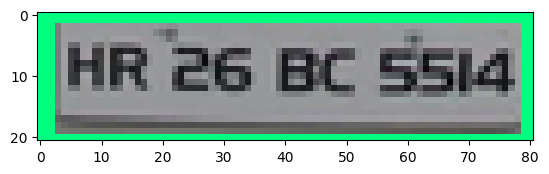

In [66]:
# Apply ROI filtering and OCR
for idx, box in enumerate(boxes):
    print(box)
    roi = box*[height, width, height, width]
    print(roi)
    region = image[int(roi[0]):int(roi[2]),int(roi[1]):int(roi[3])]
    reader = easyocr.Reader(['en'])
    ocr_result = reader.readtext(region)
    print(ocr_result)
    plt.imshow(cv2.cvtColor(region, cv2.COLOR_BGR2RGB))

In [67]:
ocr_result[0]

([[3, 3], [81, 3], [81, 17], [3, 17]], 'HR 26 BC 5514', 0.6850021148813313)

In [68]:
for result in ocr_result:
    print(np.sum(np.subtract(result[0][2],result[0][1])))
    print(result[1])

14
HR 26 BC 5514


In [69]:
#OCR Filtering


In [70]:
region_threshold = 0.5


In [71]:
def filter_text(region, ocr_result, region_threshold):
    rectangle_size = region.shape[0]*region.shape[1]
    
    plate = [] 
    for result in ocr_result:
        length = np.sum(np.subtract(result[0][1], result[0][0]))
        height = np.sum(np.subtract(result[0][2], result[0][1]))
        
        if length*height / rectangle_size > region_threshold:
            plate.append(result[1])
    return plate


In [72]:
filter_text(region, ocr_result, region_threshold)

['HR 26 BC 5514']

In [73]:
#Bring it Together


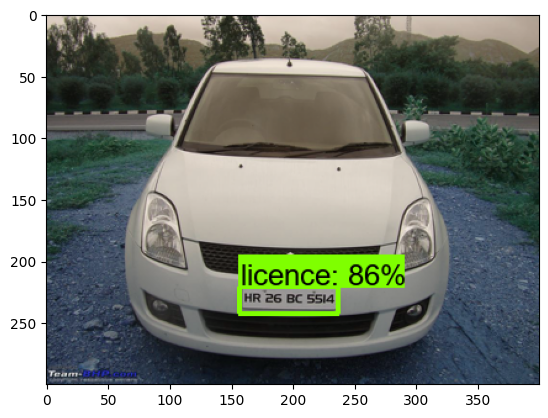

In [74]:
plt.imshow(image_np_with_detections)

In [75]:
region_threshold 


0.5

In [76]:
def ocr_it(image, detections, detection_threshold, region_threshold):
    
    # Scores, boxes and classes above threhold
    scores = list(filter(lambda x: x> detection_threshold, detections['detection_scores']))
    boxes = detections['detection_boxes'][:len(scores)]
    classes = detections['detection_classes'][:len(scores)]
    
    # Full image dimensions
    width = image.shape[1]
    height = image.shape[0]
    
    # Apply ROI filtering and OCR
    for idx, box in enumerate(boxes):
        roi = box*[height, width, height, width]
        region = image[int(roi[0]):int(roi[2]),int(roi[1]):int(roi[3])]
        reader = easyocr.Reader(['en'])
        ocr_result = reader.readtext(region)
        
        text = filter_text(region, ocr_result, region_threshold)
        
        plt.imshow(cv2.cvtColor(region, cv2.COLOR_BGR2RGB))
        plt.show()
        print(text)
        return text, region

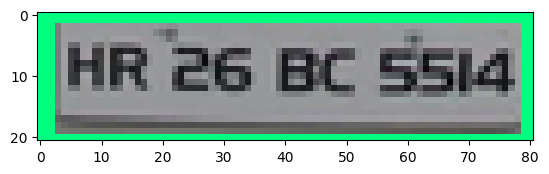

['HR 26 BC 5514']


In [77]:
text, region = ocr_it(image_np_with_detections, detections, detection_threshold, region_threshold)

In [81]:
text

['HR 26 BC 5514']

In [91]:
# Sample list containing characters recognized from the number plate


# Convert the list of characters to a single string
recognized_text = ''.join(text)

# File path where you want to save the .txt file
file_path = "recognized_plate.txt"

# Writing the recognized text to a .txt file
with open(file_path, "w") as file:
    file.write(recognized_text)

print("Successfully saved recognized characters to:", file_path)


Successfully saved recognized characters to: recognized_plate.txt


In [92]:
import csv
from datetime import datetime
recognized_text = ''.join(text)

# Get the current date and time
current_datetime = datetime.now().strftime("%Y-%m-%d %H:%M:%S")

# File path where you want to save the CSV file
file_path = "recognized_plate.csv"

# Writing the recognized text, date, and time to a CSV file
with open(file_path, "a", newline='') as file:
    writer = csv.writer(file)
    writer.writerow([current_datetime, recognized_text])

print("Successfully saved recognized characters with date and time to:", file_path)

Successfully saved recognized characters with date and time to: recognized_plate.csv


In [93]:


# Function to read the allowed vehicle number plates from a file
def read_allowed_number_plates(file_path):
    with open(file_path, "r") as file:
        allowed_number_plates = [line.strip() for line in file]
    return allowed_number_plates

# File path for allowed vehicle number plates
allowed_file_path = "allowedplates.txt"
# File path for recognized number plates and date-time
recognized_file_path = "recognized_plate.csv"

# Read allowed number plates
allowed_number_plates = read_allowed_number_plates(allowed_file_path)

# Read recognized number plates and date-time
recognized_data = []
with open(recognized_file_path, "r") as file:
    reader = csv.reader(file)
    for row in reader:
        recognized_data.append(row)

# Compare recognized number plates with allowed number plates
for date_time, recognized_plate in recognized_data:
    if recognized_plate in allowed_number_plates:
        print(f"Vehicle with plate '{recognized_plate}' recognized at {date_time} is allowed.")
    else:
        print(f"Vehicle with plate '{recognized_plate}' recognized at {date_time} is not allowed.")


Vehicle with plate 'HR 26 BC 5514' recognized at 2024-02-12 16:02:15 is not allowed.


In [95]:
def remove_all_rows_from_csv(file_path):
    """
    Remove all rows from a CSV file.

    Parameters:
        file_path (str): The file path of the CSV file.
    """
    # Write an empty list to the CSV file
    with open(file_path, "w", newline='') as file:
        writer = csv.writer(file)
        writer.writerows([])

# File path for recognized number plates and date-time
recognized_file_path = "recognized_plate.csv"

# Remove all rows from the CSV file
remove_all_rows_from_csv(recognized_file_path)

print(f"All data removed from {recognized_file_path}.")


All data removed from recognized_plate.csv.


In [89]:
text

['HR 26 BC 5514']

In [78]:
#save results

In [79]:
import csv
import uuid

In [80]:
'{}.jpg'.format(uuid.uuid1())

'bc511f9e-c98c-11ee-8ce1-04d3b0d11f04.jpg'

In [ ]:
def save_results(text, region, csv_filename, folder_path):
    img_name = '{}.jpg'.format(uuid.uuid1())
    
    cv2.imwrite(os.path.join(folder_path, img_name), region)
    
    with open(csv_filename, mode='a', newline='') as f:
        csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
        csv_writer.writerow([img_name, text])
save_results(text, region, 'detection_results.csv', 'Detection_Images')

In [ ]:
def save_results(text, region, csv_filename, folder_path):
    img_name = '{}.jpg'.format(uuid.uuid1())
    
    cv2.imwrite(os.path.join(folder_path, img_name), region)
    
    with open(csv_filename, mode='a', newline='') as f:
        csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
        csv_writer.writerow([img_name, text])

In [ ]:
region


In [ ]:
save_results(text, region, 'detection_results.csv', 'Detection_Images')

10. Real Time Detections from your Webcam

In [96]:
pip uninstall opencv-python-headless

  Using cached opencv_python_headless-4.9.0.80-cp37-abi3-win_amd64.whl.metadata (20 kB)
Using cached opencv_python_headless-4.9.0.80-cp37-abi3-win_amd64.whl (38.5 MB)


DEPRECATION: Loading egg at c:\users\smm\desktop\anpr\tfod\lib\site-packages\absl_py-2.1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\users\smm\desktop\anpr\tfod\lib\site-packages\apache_beam-2.54.0rc1-py3.11-win-amd64.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\users\smm\desktop\anpr\tfod\lib\site-packages\avro_python3-1.10.2-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\users\smm\desktop\anpr\tfod\lib\site-packages\contextlib2-21.6.

In [87]:
detections

{'detection_boxes': array([[7.39031911e-01, 3.90751660e-01, 8.06849837e-01, 5.93169630e-01],
        [7.53122389e-01, 3.87465268e-01, 8.60585034e-01, 6.13341033e-01],
        [3.06920081e-01, 9.41673458e-01, 4.26737636e-01, 9.82690990e-01],
        [7.24352658e-01, 3.86362493e-01, 8.37556779e-01, 5.95172048e-01],
        [3.36698741e-01, 9.42202210e-01, 4.59693044e-01, 9.82663512e-01],
        [6.94022655e-01, 4.13855255e-01, 7.95338631e-01, 6.09153092e-01],
        [3.94823760e-01, 3.59341770e-01, 4.72328991e-01, 4.22182471e-01],
        [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 1.00000000e+00],
        [9.46569964e-02, 9.48254392e-03, 1.68713033e-01, 7.24741518e-02],
        [7.19636321e-01, 4.44260478e-01, 8.06911707e-01, 6.22742534e-01],
        [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 9.13167298e-01],
        [3.91845345e-01, 3.56881082e-01, 4.40149128e-01, 4.84250188e-01],
        [7.23004818e-01, 4.98148710e-01, 8.15653563e-01, 6.04175329e-01],
        [1.16368301

In [ ]:
pip uninstall opencv-python-headless -y

In [ ]:
pip install opencv-python --upgrade

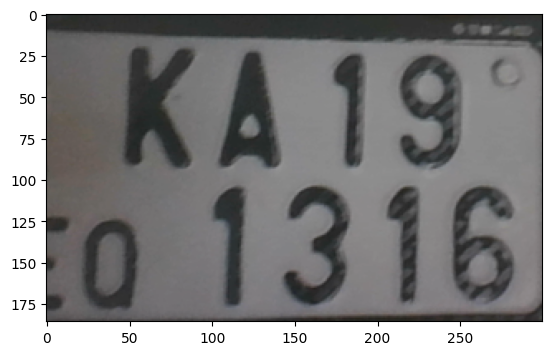

['0 1316']


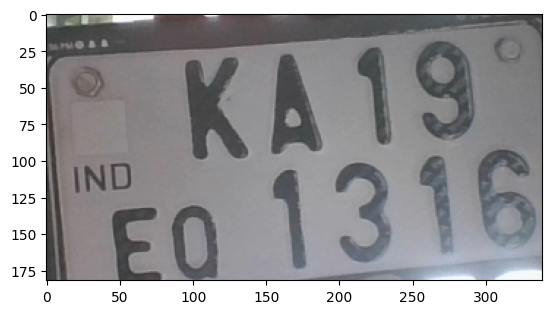

[]


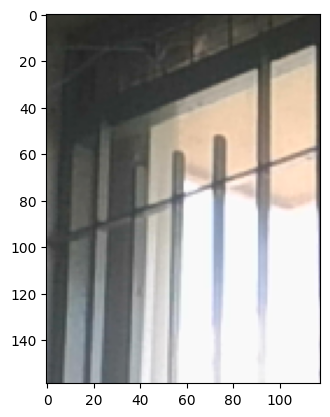

[]


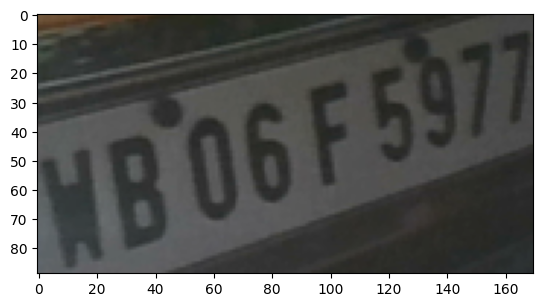

[]


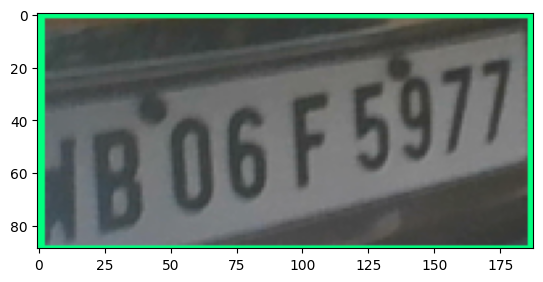

[]


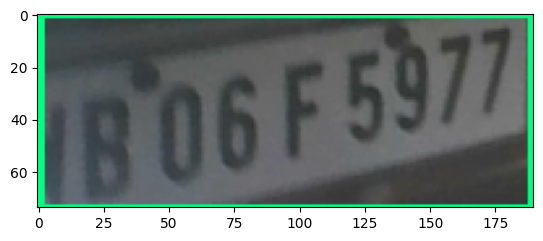

[]


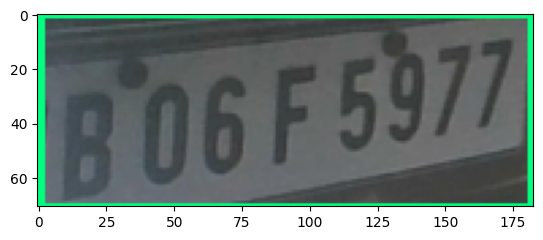

[]


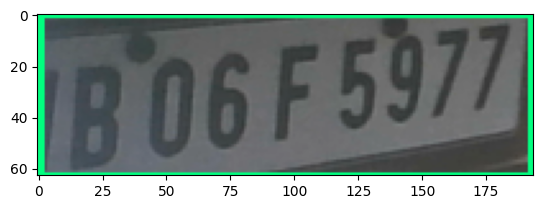

[]


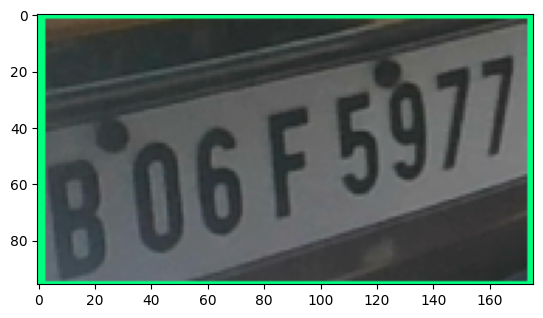

[]


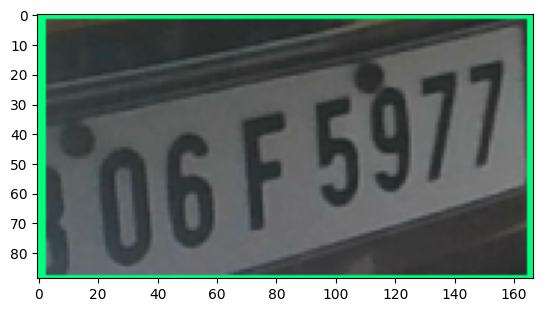

[]


KeyboardInterrupt: 

In [88]:
cap = cv2.VideoCapture(0)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

while cap.isOpened(): 
    ret, frame = cap.read()
    image_np = np.array(frame)
    
    input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
    detections = detect_fn(input_tensor)
    
    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
                  for key, value in detections.items()}
    detections['num_detections'] = num_detections

    # detection_classes should be ints.
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

    label_id_offset = 1
    image_np_with_detections = image_np.copy()

    viz_utils.visualize_boxes_and_labels_on_image_array(
                image_np_with_detections,
                detections['detection_boxes'],
                detections['detection_classes']+label_id_offset,
                detections['detection_scores'],
                category_index,
                use_normalized_coordinates=True,
                max_boxes_to_draw=5,
                min_score_thresh=.8,
                agnostic_mode=False)
    
    try: 
        text, region = ocr_it(image_np_with_detections, detections, detection_threshold, region_threshold)
        save_results(text, region, 'realtimeresults.csv', 'Detection_Images')
    except:
        pass

    cv2.imshow('object detection',  cv2.resize(image_np_with_detections, (800, 600)))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        cap.release()
        cv2.destroyAllWindows()
        break

# 10. Freezing the Graph

In [98]:
import tensorflow as tf
gpus = tf.config.list_physical_devices("GPU")


In [ ]:
import torch

# Check if GPU is available
if torch.cuda.is_available():
    # Get the list of available GPUs
    gpus = torch.cuda.device_count()
    for gpu in range(gpus):
        print("Found a GPU with the name:", torch.cuda.get_device_name(gpu))
else:
    print("Failed to detect a GPU.")


In [ ]:
FREEZE_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'exporter_main_v2.py ')

In [ ]:
command = "python {} --input_type=image_tensor --pipeline_config_path={} --trained_checkpoint_dir={} --output_directory={}".format(FREEZE_SCRIPT ,files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'], paths['OUTPUT_PATH'])

In [ ]:
print(command)

In [ ]:
!{command}

# 11. Conversion to TFJS

In [ ]:
!pip install tensorflowjs

In [ ]:
command = "tensorflowjs_converter --input_format=tf_saved_model --output_node_names='detection_boxes,detection_classes,detection_features,detection_multiclass_scores,detection_scores,num_detections,raw_detection_boxes,raw_detection_scores' --output_format=tfjs_graph_model --signature_name=serving_default {} {}".format(os.path.join(paths['OUTPUT_PATH'], 'saved_model'), paths['TFJS_PATH'])

In [ ]:
print(command)

In [ ]:
!{command}

In [ ]:
# Test Code: https://github.com/nicknochnack/RealTimeSignLanguageDetectionwithTFJS

# 12. Conversion to TFLite

In [ ]:
TFLITE_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'export_tflite_graph_tf2.py ')

In [ ]:
command = "python {} --pipeline_config_path={} --trained_checkpoint_dir={} --output_directory={}".format(TFLITE_SCRIPT ,files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'], paths['TFLITE_PATH'])

In [ ]:
print(command)

In [ ]:
!{command}

In [ ]:
FROZEN_TFLITE_PATH = os.path.join(paths['TFLITE_PATH'], 'saved_model')
TFLITE_MODEL = os.path.join(paths['TFLITE_PATH'], 'saved_model', 'detect.tflite')

In [ ]:
command = "tflite_convert \
--saved_model_dir={} \
--output_file={} \
--input_shapes=1,300,300,3 \
--input_arrays=normalized_input_image_tensor \
--output_arrays='TFLite_Detection_PostProcess','TFLite_Detection_PostProcess:1','TFLite_Detection_PostProcess:2','TFLite_Detection_PostProcess:3' \
--inference_type=FLOAT \
--allow_custom_ops".format(FROZEN_TFLITE_PATH, TFLITE_MODEL, )

In [ ]:
print(command)

In [ ]:
!{command}

# 13. Zip and Export Models 

In [ ]:
!tar -czf models.tar.gz {paths['CHECKPOINT_PATH']}

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!pip list
